In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
train_df=pd.read_csv("C:\\Users\pavik\\Documents\\teksands_assignment_ml\\pca project\\train.csv")

In [3]:
print("shape of train and test set :"+ str(train_df.shape))

shape of train and test set :(42000, 785)


In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = train_df['label']
X = train_df.drop("label",axis=1)

C:\Users\pavik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


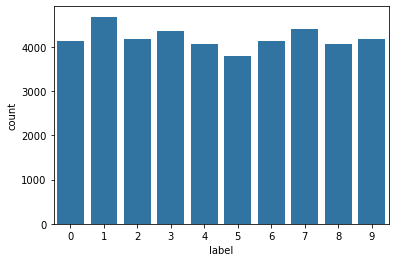

In [6]:
sns.countplot(y, color = sns.color_palette()[0]);

we can see here almost all labels  appear more than 3000

let's plot the images

C:\Users\pavik\AppData\Local\Temp/ipykernel_6648/3301684301.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(num_images/10,10,digit_num+1) #create subplots


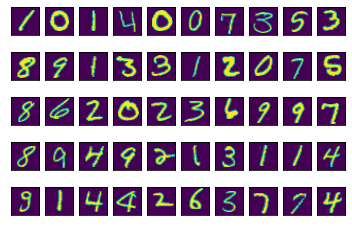

In [7]:
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images): 
            plt.subplot(num_images/10,10,digit_num+1) #create subplots
            mat_data = X.iloc[digit_num].values.reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images(50)

#### Lets chech the accuracy of the decision tree on classification of the mnist data set before using the principal componet analysis technique to reduce dimensionality


Input Shape: (28140, 784)

Accuracy: 84.42%

[[1229    4   11   15    7   20   20    7   14    6]
 [   3 1418   20   14   13   13    5    8   16   10]
 [  18   32 1149   35   22   13   30   47   53   15]
 [  10   18   57 1144   16   89    7   49   45   36]
 [   5   10   18   10 1150   10   19    8   49   79]
 [  16   16   17   56   18  925   38   27   41   51]
 [  22    8   27   11   31   32 1206    4   48    8]
 [  13   13   47   14   20    9    1 1303   13   47]
 [  15   32   38   56   23   26   23   10 1061   50]
 [  11    7   24   26   54   22    8   38   42 1116]]


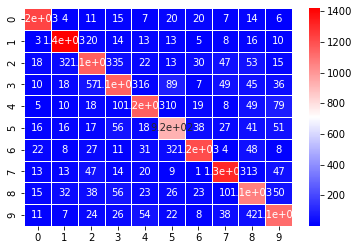

In [8]:
def fit_decision_tree_classifier(X, y, print_output=True):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.33, 
                                                        random_state=42)

    clf = DecisionTreeClassifier(max_depth=10)

    clf.fit(X_train, y_train)

    y_preds = clf.predict(X_test)

    acc = accuracy_score(y_test, y_preds)
    
    if print_output == True:
        mat = confusion_matrix(y_test, y_preds)
        sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5)

        print('\nInput Shape: {}'.format(X_train.shape))
        print('\nAccuracy: {:2.2%}\n'.format(acc))
        print(mat)
    
    return acc
fit_decision_tree_classifier(X, y);

The dicision tree showing pretty good result. let's see after the using the pca

This function transforms the data using PCA to create n_components and provides the results of the transformation back.

In [9]:
def do_pca(n_components, data):
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

As a first pass, do PCA on just the two first principal components. So, we are fitting the exact samedecision tree classifier on much lower-dimensional data.

In [10]:
pca, X_pca = do_pca(2, X)

In [11]:
pca.explained_variance_ratio_

array([0.05747953, 0.04111691])

we will visualize the image of the dataset after using the pca

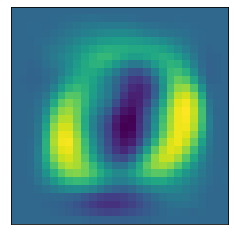

In [12]:
def plot_component(pca, comp):
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)  #reshape images
        plt.imshow(mat_data); #plot the data
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) #removes numbered labels on y-axis   
plot_component(pca, 0)

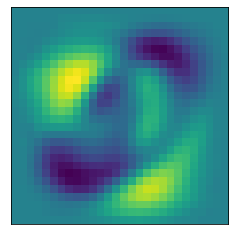

In [13]:
plot_component(pca, 1)

let's see the accuracy of the decision tree for  with 2 pca components


Input Shape: (28140, 2)

Accuracy: 35.45%

[[ 829    0  256   15   16   29  168    0   20    0]
 [   0 1315    4    2    9   36   27   48   32   47]
 [ 172    3  522  143  131   60  258   21   67   37]
 [  44   16  316  165  211  102  279   77  130  131]
 [  37   51  177  165  249   64  194  125   67  229]
 [  32   16  190   95  139  240  308   10  135   40]
 [ 185   26  358   56   62  160  432    1  100   17]
 [   2   79   51   87  165   23   81  511   65  416]
 [  36   36  186  122  173  168  263   38  208  104]
 [  14  106   60  114  208   27   91  247   39  442]]


0.3544733044733045

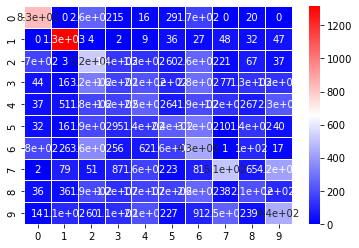

In [14]:
fit_decision_tree_classifier(X_pca, y)

An accuracy around 35.39% indicates that just two principal components isn’t giving enough information to clearly identify the digits.

In order to see how the PCA components are separating out the digits, lets use the following helper function to plot the data in a 2 dimensional space to view separation.

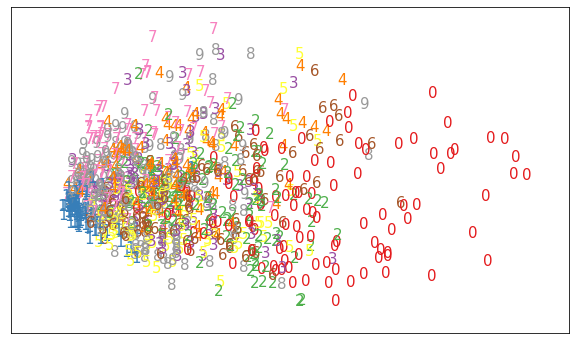

In [15]:
def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), 
                 color=plt.cm.Set1(y[i]), 
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])
plot_components(X_pca[:1000], y[:1000])

We see that it does a reasonable job separating out zeros, sevens, and ones. But, this is an indication of what we saw in the confusion matrix. The numbers are pretty jumbled.

#### Perform PCA and Gauge Max Accuracy
As a final step, iteratively check how many principal components would be required in order to reach a reasonable accuracy with the same decision tree classsifier

In [16]:
acc_list, pc_list = [], []
for pc in range(2,50):
    pca, X_pca = do_pca(pc, X)
    acc = fit_decision_tree_classifier(X_pca, y, print_output=False);
    acc_list.append(acc)
    pc_list.append(pc)

In [17]:
pca.components_

array([[ 0.00000000e+00,  6.93889390e-18,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.11022302e-16,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.63278329e-17,  1.11022302e-16, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 4.42830293e-17, -8.16236682e-17, -8.29172199e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.13192620e-17, -8.79970618e-18,  8.56561009e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.13404242e-17,  1.08929430e-18,  6.67893949e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [18]:
pca.explained_variance_ratio_

array([0.05747953, 0.04111691, 0.03782867, 0.02939862, 0.02556439,
       0.02229844, 0.01952552, 0.01771605, 0.0156266 , 0.01424956,
       0.01361009, 0.01222541, 0.01135736, 0.0111309 , 0.0105031 ,
       0.01012325, 0.00951302, 0.00934514, 0.00907258, 0.00885326,
       0.00838903, 0.00812015, 0.00775158, 0.00752308, 0.00727674,
       0.00698713, 0.00690433, 0.00664874, 0.00630625, 0.00616161,
       0.00610822, 0.00596899, 0.00577016, 0.00573506, 0.00564432,
       0.00545931, 0.00538923, 0.00522898, 0.00502319, 0.00487419,
       0.00480018, 0.00475175, 0.00457413, 0.00453501, 0.00446905,
       0.00441825, 0.00440134, 0.00430797, 0.0042339 ])

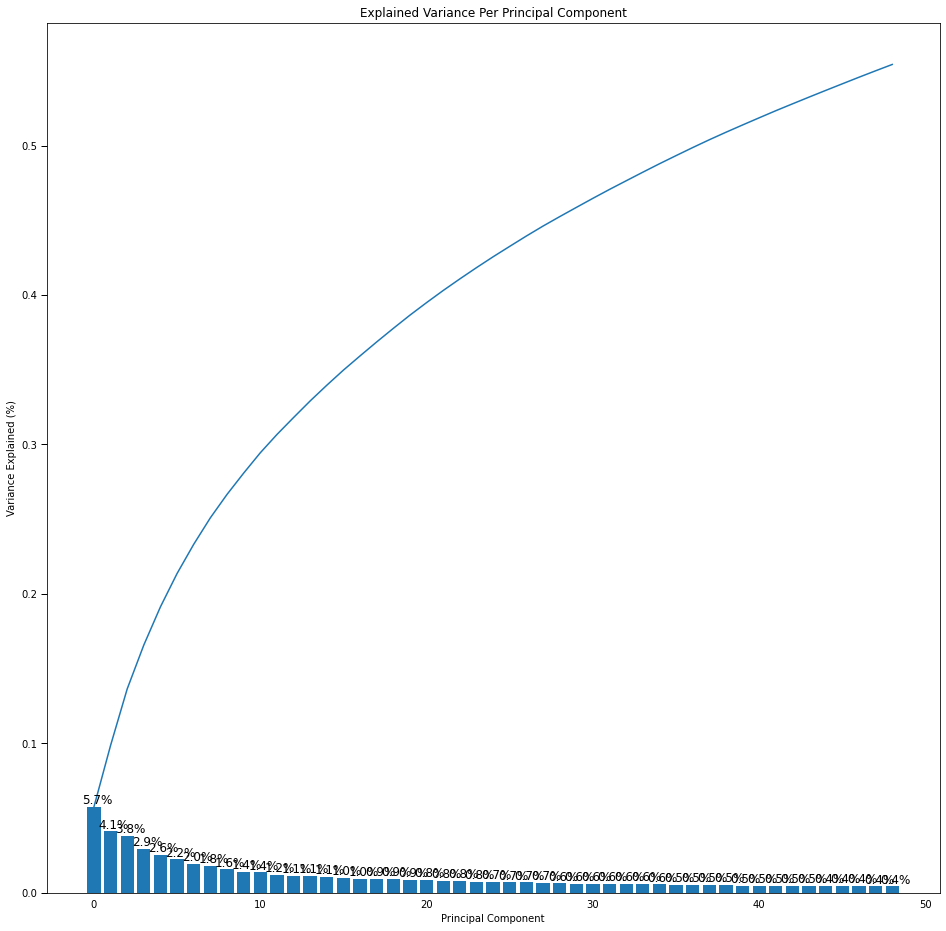

In [19]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(16, 16))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]), 
                    va="bottom", 
                    ha="center", 
                    fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

Each of the bars represents the amount of variability explained by each component. So you can see the first component explains 5.7% of the variability in the image data. The second explains 4.1% of the variability and so on.

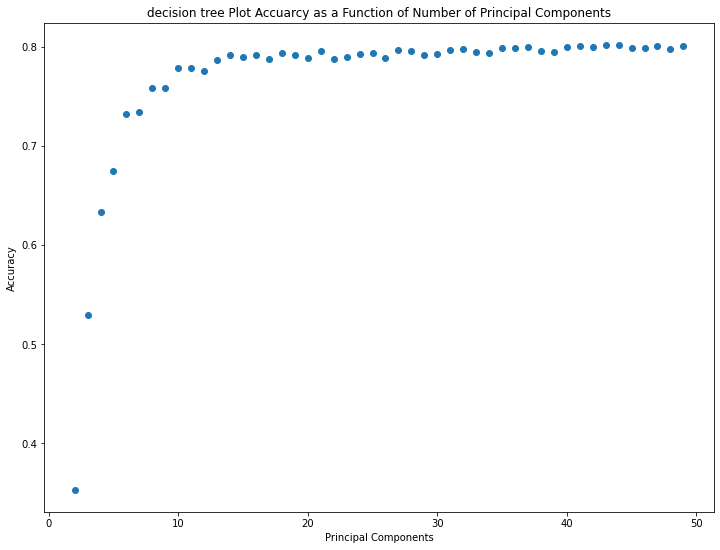

In [20]:
plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title('decision tree Plot Accuarcy as a Function of Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy');

In [21]:
np.max(acc_list), pc_list[np.where(acc_list == np.max(acc_list))[0][0]]

(0.8017316017316017, 44)

the maximum accuracy attained is80.08% with 44 principal components. Beyond this peak, additional principal components appear to mostly contribute noise.
Note that 44 principal component columns is a significant reduction in dataset complexity from the original 784 pixel columns!
from 15 -50 almost every component has the same accuracy in the range of 78.5-80%. so we will choose 16 components to build the model
#### lets build the model of the decision tree for pca with 16componets:

In [22]:
pca, X_pca = do_pca(16, X)


Input Shape: (28140, 16)

Accuracy: 78.82%

[[1167    4   15    9   10   38   14   14   45   17]
 [   2 1429   12   12    6    6    6    3   33   11]
 [  30    4 1075   49   35   23   37   26  113   22]
 [  18   33   69 1044    5   88    9   31  133   41]
 [   6   11   32    5 1027   18   18   27   42  172]
 [  46   17   15  105   18  786   24   19  121   54]
 [  25    4   55   17   16   21 1199    1   51    8]
 [  11   22   15   13   22   11    0 1202   48  136]
 [  19   20   49   58   10  105    4   26  993   50]
 [  10   21    8   15  108   17    1  112   54 1002]]


0.7881673881673882

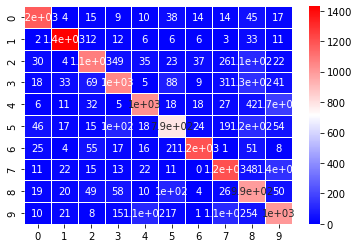

In [23]:
fit_decision_tree_classifier(X_pca, y)

#### Here we obtained the accuracy of 78.81%